In [1]:
# !pip install ipywidgets
# !pip install ipympl

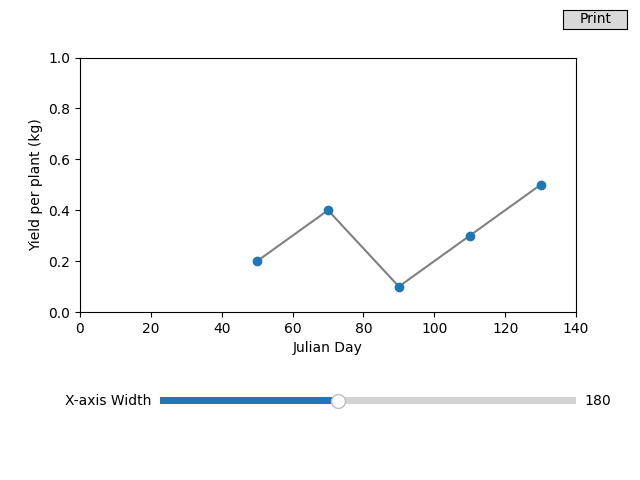

{
    "x": [
        50,
        70,
        90,
        110,
        130,
        156
    ],
    "y": [
        0.2,
        0.4,
        0.1,
        0.3,
        0.5,
        0.183
    ]
}


In [22]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.backend_bases import MouseButton
from matplotlib.widgets import Slider, Button
import numpy as np
import json

# Initial data, ensure x_data is of integer type
x_data = np.array([50, 70, 90, 110, 130], dtype=int)
y_data = np.array([.2, .4, .1, .3, .5])


# Create figure and axis objects and scatter plot
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.35)  # Increase bottom margin to allow space for labels and slider
scat = ax.scatter(x_data, y_data, picker=True)  # Enable picking on the scatter plot
line, = ax.plot(x_data, y_data, zorder=0, color='grey')  # Add line plot

# Event handler functions
picked_point_index = None

# Define the print_json function to print sorted by x_data
def print_json(x_data, y_data):
    order = np.argsort(x_data)
    sorted_x = x_data[order].astype(int).tolist()  # Ensure x_data is cast to int
    sorted_y = y_data[order].tolist()
    data_dict = {'x': sorted_x, 'y': sorted_y}
    json_data = json.dumps(data_dict, indent=4)
    print(json_data)

# Button event handler
def print_button_clicked(event):
    print_json(x_data, y_data)

# Create the Print Button at the top right
fig_width, fig_height = fig.get_size_inches()
button_width = 0.1 * fig_width / fig_width  # Convert to figure coordinates
button_height = 0.04 * fig_height / fig_height  # Convert to figure coordinates
ax_button = plt.axes([1 - button_width - 0.02, 1 - button_height - 0.02, button_width, button_height])
button = Button(ax_button, 'Print')

# Register the event handler
button.on_clicked(print_button_clicked)

def update_line():
    global line, x_data, y_data
    # Sort points based on x_data and update line data
    order = np.argsort(x_data)
    sorted_x = x_data[order]
    sorted_y = y_data[order]
    line.set_data(sorted_x, sorted_y)
    fig.canvas.draw_idle()

def onpick(event):
    global picked_point_index
    if event.artist == scat:
        mouse_event = event.mouseevent
        if mouse_event.button == MouseButton.RIGHT:
            ind = event.ind[0]
            picked_point_index = ind

# Update onclick to cast x_data to integers
def onclick(event):
    global x_data, y_data, scat, picked_point_index
    if event.button == MouseButton.LEFT:
        if event.dblclick:
            x_data = np.append(x_data, int(event.xdata))  # Cast new point x-coordinate to int
            y_data = np.append(y_data, event.ydata)
            y_data = np.round(y_data, 4)
        elif picked_point_index is not None:
            x_data[picked_point_index] = int(event.xdata)  # Cast moved point x-coordinate to int
            y_data[picked_point_index] = event.ydata
            picked_point_index = None
    elif event.button == MouseButton.RIGHT and not event.dblclick and picked_point_index is not None:
        x_data = np.delete(x_data, picked_point_index)
        y_data = np.delete(y_data, picked_point_index)
        picked_point_index = None
    scat.set_offsets(np.column_stack((x_data, y_data)))
    update_line()  # Update the line plot

# Add a Slider
ax_slider = plt.axes([0.25, 0.15, 0.65, 0.03])  # Adjust slider position to be a bit higher
slider = Slider(ax_slider, 'X-axis Width', 90, 300, valinit=180, valstep=1)

# Update the plot based on the slider
def update(val):
    ax.set_xlim(0, slider.val)
    # Automatically adjust y-axis limits to include all data points
    ax.set_ylim(0, max(y_data) + 1)
    fig.canvas.draw_idle()

slider.on_changed(update)

# Connect event handlers
fig.canvas.mpl_connect('pick_event', onpick)
fig.canvas.mpl_connect('button_press_event', onclick)

# Set initial axes limits and labels
ax.set_xlim(0, max(x_data)+10)
ax.set_ylim(0, min(max(y_data)*2, max(y_data)+1))
ax.set_xlabel('Julian Day')
ax.set_ylabel('Yield per plant (kg)')

update_line()  # Draw the initial line

plt.show()

In [23]:
!pip install voila

  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached pandocfilters-1.5.0-py2.py3-none-any.whl (8.7 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 21.4.0
    Uninstalling attrs-21.4.0:
      Successfully uninstalled attrs-21.4.0
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
